In [1]:
import os
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import tensorflow as tf
import tensorflow as keras
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.metrics import mean_absolute_percentage_error, r2_score
def load_volume_fractions(folder):
    data = []
    for i in range(10000):
        path = os.path.join(folder, f'prop_{i}.dat')
        vf = np.loadtxt(path)
        data.append(vf)
    return np.array(data)

# Load stress data and compute von Mises stress
def load_stress_data(folder):
    data = []
    for i in range(10000):
        path = os.path.join(folder, f'stress_{i}.txt')
        stress = np.loadtxt(path)
        tau_xx, tau_yy, tau_xy = stress[:,0], stress[:,1], stress[:,2]
        vm_stress = np.sqrt(tau_xx**2 + tau_yy**2 - tau_xx*tau_yy + 3*tau_xy**2)
        data.append(np.max(vm_stress))
    return np.array(data)

# Replace these with actual paths
vf_data = np.array(load_volume_fractions('D:/Downloads/Q7/volume fraction'))#Please replace with the actual path to your volume fraction data
stress_data = load_stress_data('D:/Downloads/Q7/stress_node')#Please replace with the actual path to your stress data


y = stress_data
X_train, X_test, y_train, y_test = train_test_split(vf_data, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
y_scaler = StandardScaler()
y_train_scale = y_scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scale= y_scaler.fit_transform(y_test.reshape(-1, 1)).flatten()
#Custom R^2 metric
def r2_metric(y_true, y_pred):
    SS_res = tf.reduce_sum(tf.square(y_true - y_pred))
    SS_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return 1 - (SS_res / (SS_tot + tf.keras.backend.epsilon()))

(8000, 441)
(2000, 441)


Test MSE: 0.3735


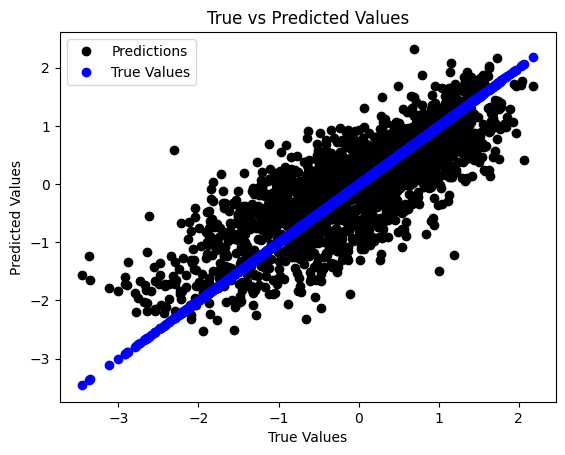

In [2]:
#Approach 1
#Base Line Model
def linear_regression(x_train, y_train_scale, learning_rate, iterations):
    weights = np.random.randn(x_train.shape[1])  # shape: (1 + num_nodes,)
    bais = np.random.randn(1)  # shape: (1,)
    for i in range(iterations):
        for j in range(len(x_train)):
            # Compute prediction
            y_pred = np.dot(x_train[j], weights) + bais

            # Compute gradients
            error = y_pred - y_train_scale[j]
            weights_gradient = (2 / len(x_train)) * x_train[j] * error
            bais_gradient = (2 / len(x_train)) * error

            # Update weights and bias
            weights -= learning_rate * weights_gradient
            bais -= learning_rate * bais_gradient
    return weights, bais

def predict(x_test, weights, bais):
    return np.dot(x_test, weights) + bais

Weights, bais = linear_regression(X_train, y_train_scale, learning_rate=0.01, iterations=1000)
# Evaluate on test set
test_predictions = predict(X_test, Weights, bais)
test_mse = np.mean((test_predictions - y_test_scale) ** 2)

print(f"Test MSE: {test_mse:.4f}")

#Plotting Predictions vs Actual values

plt.figure()
plt.plot(y_test_scale, test_predictions, 'o', label='Predictions', color='black')
plt.plot(y_test_scale, y_test_scale, 'o', label='True Values', color='blue')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.legend()
plt.show()

c:\Users\CC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (Dense)                   │ (None, 256)            │       113,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 172,929 (675.50 KB)

 Trainable params: 172,929 (675.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
225/225 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 13.7421 - val_loss: 0.3239
Epoch 2/500
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1447 - val_loss: 0.0783
Epoch 3/500
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1034 - val_loss: 0.0741
Epoch 4/500
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0800 - val_loss: 0.0604
Epoch 5/500
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0744 - val_loss: 0.0586
Epoch 6/500
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0655 - val_loss: 0.0414
Epoch 7/500
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0559 - val_loss: 0.0565
Epoch 8/500
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0540 - val_loss: 0.0375
Epoch 9/500
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0481 - val_loss: 0.0514
Epoch 10/500
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0421 - val_loss: 0.0202
Epoch 11/500
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0326 - val_loss: 0.0359
Epoch 12/500
225/225 ━━━━━━━━━━━━━━━━━━

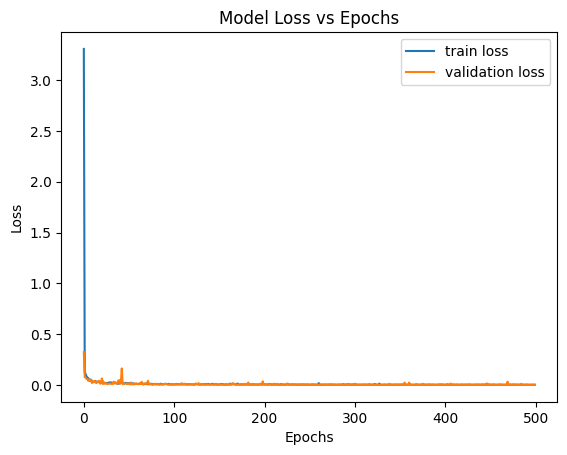

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0022
Test Loss: 0.0022691471967846155
Mean Absolute Percentage Error (MAPE): 0.00042067692380506433
R^2 Score: 0.9977308565726773


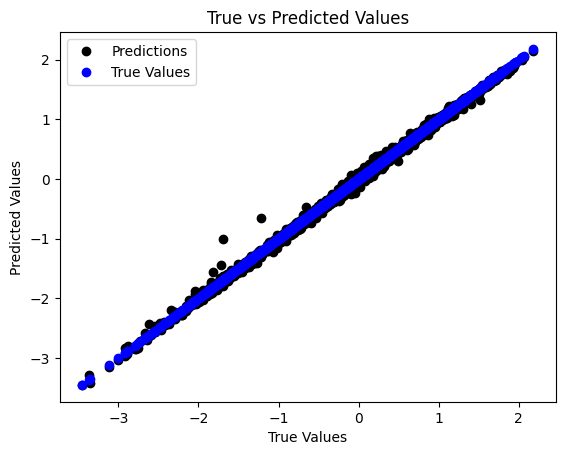

In [3]:
# Neural Network Model
#Train the model
tf.keras.backend.clear_session()
initalizer = keras.initializers.HeNormal()
model1 = Sequential()
model1.add(Dense(256, input_dim = 441, activation='relu', name = 'Input' , kernel_initializer=initalizer))
model1.add(Dense(128, activation='relu',kernel_initializer=initalizer))
model1.add(Dense(128, activation='relu',kernel_initializer=initalizer))
model1.add(Dense(64, activation='relu',kernel_initializer=initalizer))
model1.add(Dense(32, activation='relu',kernel_initializer=initalizer))
model1.add(Dense(1, kernel_initializer=initalizer))
model1.summary()
model1.compile(optimizer = keras.optimizers.Adam(learning_rate=0.01), loss = 'mse')
history1 = model1.fit(X_train, y_train_scale, epochs=500, batch_size=32, validation_split=0.1)
y_pred1_scaled = model1.predict(X_test)
#Plotting MSE vs Epochs
plt.plot(history1.history['loss'], label='train loss')
plt.plot(history1.history['val_loss'], label='validation loss')
plt.title('Model Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
#Calculating the test loss and r2 score
test_loss = model1.evaluate(X_test, y_test_scale)
print("Test Loss:", test_loss)
y_pred1 = y_scaler.inverse_transform(y_pred1_scaled)
y_test_original = y_scaler.inverse_transform(y_test_scale.reshape(-1, 1))
mape = mean_absolute_percentage_error(y_test_original, y_pred1)
print("Mean Absolute Percentage Error (MAPE):", mape)
#Calculating R^2 score
r2 = r2_metric(y_test_original,y_pred1)
print("R^2 Score:", r2.numpy())
#Plotting Predictions vs Actual values
plt.figure()
plt.plot(y_test_scale, y_pred1_scaled, 'o', label='Predictions', color='black')
plt.plot(y_test_scale, y_test_scale, 'o', label='True Values', color='blue')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.legend()
plt.show()

In [4]:
#Approach 2
#PCA for dimensionality reduction
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None
    
    def fit(self, X):
        # Compute PCA components from the displacement data.
        self.mean = np.mean(X, axis=0)
        X = X - self.mean
        cov_matrix = np.cov(X.T)
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
        
        # Manual sorting in descending order
        for i in range(len(eigenvalues)):
            for j in range(i + 1, len(eigenvalues)):
                if eigenvalues[i] < eigenvalues[j]:
                    eigenvalues[i], eigenvalues[j] = eigenvalues[j], eigenvalues[i]
                    eigenvectors[:, [i, j]] = eigenvectors[:, [j, i]]
        
        self.eigenvalues = eigenvalues
        self.components = eigenvectors[:, :self.n_components]
    
    def transform(self, X):
        # Project data onto the principal components.
        X = X - self.mean
        X_new =  np.dot(X, self.components)
        return X_new
    
r = 100
pca = PCA(r)

pca.fit(X_train)
eigenvalues = pca.eigenvalues
pca_components = pca.components
X_train_new = pca.transform(X_train)

X_test_new = pca.transform(X_test)
print(X_train_new.shape)
print(X_test_new.shape)
input_dim = X_train_new.shape[1]

(8000, 100)
(2000, 100)


Test MSE: 0.3639


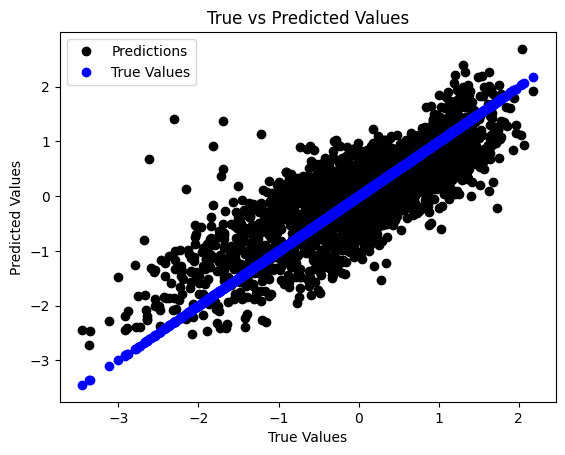

In [5]:
#Base Line Model
Weights, bais = linear_regression(X_train_new, y_train_scale, learning_rate=0.01, iterations=1000)
# Evaluate on test set
test_predictions = predict(X_test_new, Weights, bais)
test_mse = np.mean((test_predictions - y_test_scale) ** 2)

print(f"Test MSE: {test_mse:.4f}")

#Plotting Predictions vs Actual values
plt.figure()
plt.plot(y_test_scale, test_predictions, 'o', label='Predictions', color='black')
plt.plot(y_test_scale, y_test_scale, 'o', label='True Values', color='blue')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.legend()
plt.show()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (Dense)                   │ (None, 256)            │        25,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 85,633 (334.50 KB)

 Trainable params: 85,633 (334.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
225/225 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 0.6155 - val_loss: 0.0669
Epoch 2/500
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0313 - val_loss: 0.0111
Epoch 3/500
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0103 - val_loss: 0.0096
Epoch 4/500
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0067 - val_loss: 0.0099
Epoch 5/500
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0063 - val_loss: 0.0118
Epoch 6/500
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0076 - val_loss: 0.0064
Epoch 7/500
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0063 - val_loss: 0.0056
Epoch 8/500
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0087 - val_loss: 0.0025
Epoch 9/500
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0036 - val_loss: 0.0110
Epoch 10/500
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0069 - val_loss: 0.0042
Epoch 11/500
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0049 - val_loss: 0.0114
Epoch 12/500
225/225 ━━━━━━━━━━━━━━━━━━

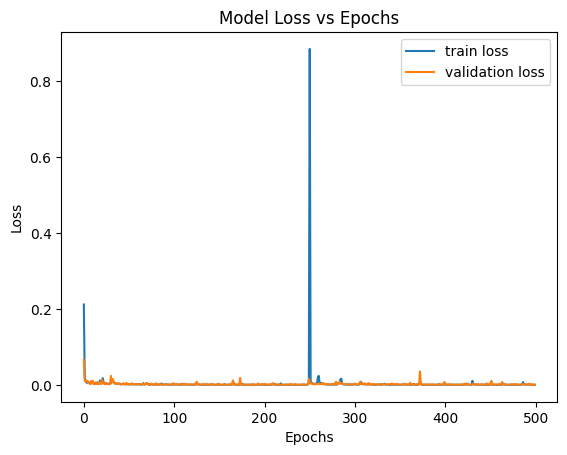

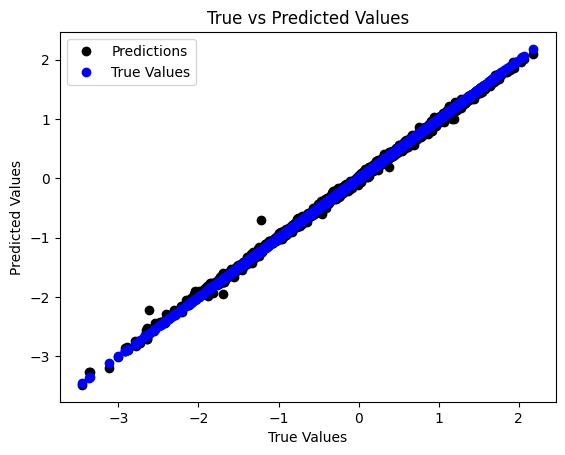

In [7]:
#Neural Network Model
tf.keras.backend.clear_session()
initalizer = keras.initializers.HeNormal()
model2 = Sequential()
model2.add(Dense(256, input_dim = r, activation='relu', name = 'Input' , kernel_initializer=initalizer))
model2.add(Dense(128, activation='relu',kernel_initializer=initalizer))
model2.add(Dense(128, activation='relu',kernel_initializer=initalizer))
model2.add(Dense(64, activation='relu',kernel_initializer=initalizer))
model2.add(Dense(32, activation='relu',kernel_initializer=initalizer))
model2.add(Dense(1, kernel_initializer=initalizer))
model2.summary()
model2.compile(optimizer = keras.optimizers.Adam(learning_rate=0.01), loss = 'mse')
history2 = model2.fit(X_train_new, y_train_scale, epochs=500, batch_size=32, validation_split=0.1)
y_pred2_scaled = model2.predict(X_test_new)
#Calculating the test loss and r2 score
test_loss = model2.evaluate(X_test_new, y_test_scale)
print("Test Loss:", test_loss)
y_pred2 = y_scaler.inverse_transform(y_pred2_scaled)
y_test_original = y_scaler.inverse_transform(y_test_scale.reshape(-1, 1))
mape = mean_absolute_percentage_error(y_test_original, y_pred2)
print("Mean Absolute Percentage Error (MAPE):", mape)
r2 = r2_metric(y_test_original, y_pred2)
print("R^2 Score:", r2.numpy())
#Plotting MSE vs Epochs
plt.plot(history2.history['loss'], label='train loss')
plt.plot(history2.history['val_loss'], label='validation loss')
plt.title('Model Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
#Plotting Predictions vs Actual values
plt.figure()
plt.plot(y_test_scale, y_pred2_scaled, 'o', label='Predictions', color='black')
plt.plot(y_test_scale, y_test_scale, 'o', label='True Values', color='blue')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.legend()
plt.show()